# Simple Linear Regression

## Import the relevant Libs

In [26]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()

## Load the Data

In [18]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [19]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [20]:
data.describe()


,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


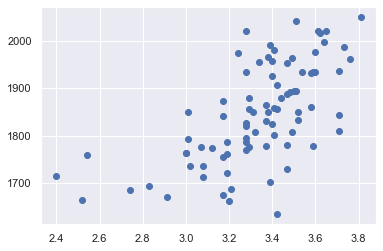

In [21]:
plt.scatter(data['GPA'], data['SAT'])

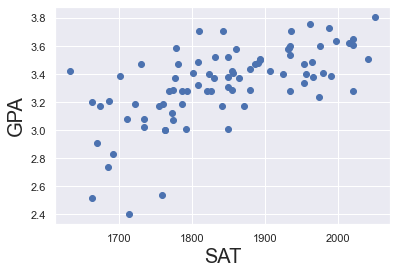

In [22]:
plt.figure()
y = data['GPA']
x1 = data['SAT']
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

plt.scatter(x1, y)
plt.show()

## Regression


In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 30 May 2021   Prob (F-statistic):           7.20e-11
Time:                        22:20:46   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

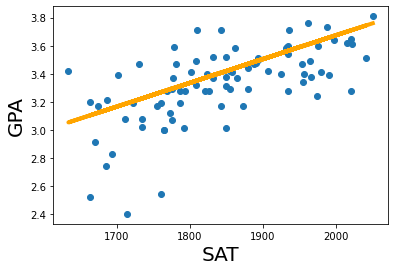

In [16]:
plt.scatter(x1, y)
yhat = 0.0017* x1 + 0.275
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show();

In [28]:
x1.shape
x_rand = np.random.random(84)

In [30]:
x_rand

array([0.2013816 , 0.27332913, 0.57889455, 0.17385599, 0.7669131 ,
       0.44098929, 0.175998  , 0.26180885, 0.53979291, 0.39854279,
       0.48228996, 0.54685465, 0.27070924, 0.55969696, 0.62550678,
       0.16716742, 0.47881504, 0.92405985, 0.92945602, 0.50259362,
       0.06633366, 0.57221682, 0.942262  , 0.13734675, 0.14508595,
       0.69730826, 0.79665813, 0.8300212 , 0.90867718, 0.77303478,
       0.11768001, 0.42855537, 0.35464494, 0.10566752, 0.14629362,
       0.04376326, 0.43620679, 0.99603611, 0.99157001, 0.1107679 ,
       0.02067688, 0.57889924, 0.13176267, 0.45618249, 0.66792891,
       0.81200417, 0.8209596 , 0.98053057, 0.47906193, 0.26741514,
       0.86160842, 0.62789231, 0.10892889, 0.07163189, 0.58260422,
       0.65333681, 0.24793039, 0.95754825, 0.62662723, 0.88700702,
       0.55657406, 0.0335023 , 0.80950326, 0.40771428, 0.60755044,
       0.66563774, 0.03677181, 0.23752403, 0.3537653 , 0.58138711,
       0.61265949, 0.04798859, 0.73083721, 0.84918948, 0.69681

In [32]:
# Experimeting with OLS
#
x = sm.add_constant(x1)
x1_rand = sm.add_constant(x_rand)
results = sm.OLS(y, x).fit()
print(results.summary())
# This doesnt work :'-(
# OLS only works with a 1d dependent variable``
results = sm.OLS(y, x, x1_rand).fir()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 30 May 2021   Prob (F-statistic):           7.20e-11
Time:                        23:19:34   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.5

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:692: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (missing == 'drop' and 'missing_idx' in kwargs and
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/data.py:70: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if missing != 'none':


AttributeError: 'OLS' object has no attribute 'fir'